In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for creating plots
from scipy import stats
import seaborn as sns #for styling the plots
#warnings.filterwarnings('ignore')
%matplotlib inline 

In [6]:

NYChousing = pd.read_csv(r'C:\Users\Nicole\Downloads\Housing_New_York_Units_by_Building.csv')
NYChousing.head()

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,69441,WFHA BROOKLYN LP.YR15.FY21,03/31/2021,NaN,209164.0,992,BERGEN STREET,Brooklyn,11216.0,3.012170e+09,...,3,0,0,0,0,0,4,0,4,4
1,69441,WFHA BROOKLYN LP.YR15.FY21,03/31/2021,NaN,295918.0,658,FRANKLIN AVENUE,Brooklyn,11238.0,3.011560e+09,...,6,0,0,0,0,0,9,0,9,9
2,69441,WFHA BROOKLYN LP.YR15.FY21,03/31/2021,NaN,295950.0,693,FRANKLIN AVENUE,Brooklyn,11238.0,3.012310e+09,...,6,1,0,0,0,0,8,0,8,8
3,69441,WFHA BROOKLYN LP.YR15.FY21,03/31/2021,NaN,295952.0,695,FRANKLIN AVENUE,Brooklyn,11238.0,3.012310e+09,...,6,1,0,0,0,0,8,0,8,8
4,69441,WFHA BROOKLYN LP.YR15.FY21,03/31/2021,NaN,295953.0,697,FRANKLIN AVENUE,Brooklyn,11238.0,3.012310e+09,...,6,1,0,0,0,0,8,0,8,8


In [12]:
NYChousing.dropna()

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,geometry
103,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52669.0,199,BROOK AVENUE,Bronx,10454.0,2.022640e+09,...,1,0,0,0,0,16,0,16,16,POINT (40.80653 -73.91999)
104,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52670.0,205,BROOK AVENUE,Bronx,10454.0,2.022640e+09,...,1,0,0,0,0,40,0,40,40,POINT (40.80668 -73.91987)
105,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52794.0,198,BROWN PLACE,Bronx,10454.0,2.022640e+09,...,1,0,0,0,0,19,0,19,19,POINT (40.80693 -73.92074)
106,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52795.0,202,BROWN PLACE,Bronx,10454.0,2.022640e+09,...,0,0,0,0,0,20,0,20,20,POINT (40.80700 -73.92069)
420,68410,272 EAST 7TH STREET,06/26/2020,06/26/2020,11158.0,272,EAST 7 STREET,Manhattan,10009.0,1.003760e+09,...,0,0,0,0,0,21,0,21,21,POINT (40.72349 -73.97748)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,50196,Belmont Venezia,01/22/2014,04/13/2015,59948.0,2404,CROTONA AVENUE,Bronx,10458.0,2.031040e+09,...,11,0,0,0,0,24,0,24,24,POINT (40.85431 -73.88341)
5029,50196,Belmont Venezia,01/22/2014,04/13/2015,87351.0,2476,HUGHES AVENUE,Bronx,10458.0,2.030760e+09,...,17,0,0,0,0,63,0,63,63,POINT (40.85693 -73.88540)
5030,50196,Belmont Venezia,01/22/2014,04/13/2015,806409.0,2412,CROTONA AVENUE,Bronx,10458.0,2.031040e+09,...,0,0,0,0,0,25,0,25,25,POINT (40.85448 -73.88333)
5031,50196,Belmont Venezia,01/22/2014,04/13/2015,806410.0,2416,CROTONA AVENUE,Bronx,10458.0,2.031040e+09,...,0,0,0,0,0,25,0,25,25,POINT (40.85455 -73.88329)


In [14]:
NYChousing2 = NYChousing.dropna()

In [8]:
## zip codes map
zips = gpd.read_file(r'C:\Users\Nicole\Downloads\ZIP_CODE_040114')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


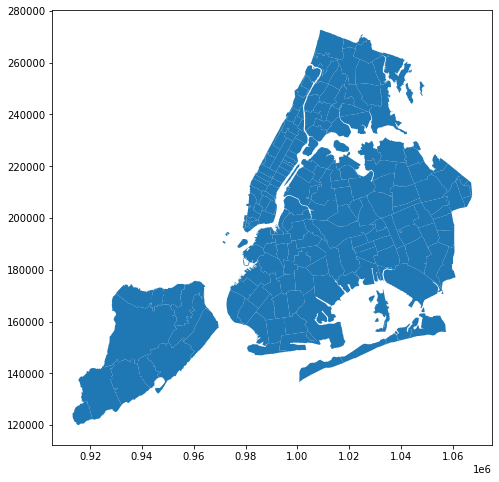

In [9]:
zips.plot(figsize=(8,8))

In [46]:
import geopandas as gpd
#merge with shape file first
df_geometry = gpd.GeoDataFrame(NYChousing2, geometry=gpd.points_from_xy(NYChousing2.Longitude, NYChousing2.Latitude))
sjoin_NYC = gpd.sjoin(df_geometry, zips, how="left", op='intersects')

<ipython-input-46-69e8289040c1>:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:2263

  sjoin_NYC = gpd.sjoin(df_geometry, zips, how="left", op='intersects')


In [47]:
df_geometry

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,geometry
103,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52669.0,199,BROOK AVENUE,Bronx,10454.0,2.022640e+09,...,1,0,0,0,0,16,0,16,16,POINT (-73.91999 40.80653)
104,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52670.0,205,BROOK AVENUE,Bronx,10454.0,2.022640e+09,...,1,0,0,0,0,40,0,40,40,POINT (-73.91987 40.80668)
105,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52794.0,198,BROWN PLACE,Bronx,10454.0,2.022640e+09,...,1,0,0,0,0,19,0,19,19,POINT (-73.92074 40.80693)
106,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52795.0,202,BROWN PLACE,Bronx,10454.0,2.022640e+09,...,0,0,0,0,0,20,0,20,20,POINT (-73.92069 40.80700)
420,68410,272 EAST 7TH STREET,06/26/2020,06/26/2020,11158.0,272,EAST 7 STREET,Manhattan,10009.0,1.003760e+09,...,0,0,0,0,0,21,0,21,21,POINT (-73.97748 40.72349)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,50196,Belmont Venezia,01/22/2014,04/13/2015,59948.0,2404,CROTONA AVENUE,Bronx,10458.0,2.031040e+09,...,11,0,0,0,0,24,0,24,24,POINT (-73.88341 40.85431)
5029,50196,Belmont Venezia,01/22/2014,04/13/2015,87351.0,2476,HUGHES AVENUE,Bronx,10458.0,2.030760e+09,...,17,0,0,0,0,63,0,63,63,POINT (-73.88540 40.85693)
5030,50196,Belmont Venezia,01/22/2014,04/13/2015,806409.0,2412,CROTONA AVENUE,Bronx,10458.0,2.031040e+09,...,0,0,0,0,0,25,0,25,25,POINT (-73.88333 40.85448)
5031,50196,Belmont Venezia,01/22/2014,04/13/2015,806410.0,2416,CROTONA AVENUE,Bronx,10458.0,2.031040e+09,...,0,0,0,0,0,25,0,25,25,POINT (-73.88329 40.85455)


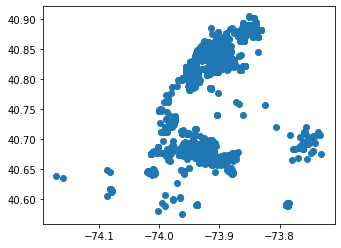

In [48]:
sjoin_NYC.plot()

In [49]:
# now group by zip codes, normalize by their population
lowincomebyzip= NYChousing2[['Postcode', 'Very Low Income Units']].groupby(by='Postcode', as_index=False).count()
lowincomebyzip


,Postcode,Very Low Income Units
0,10001.0,8
1,10002.0,28
2,10003.0,2
3,10009.0,76
4,10010.0,27
...,...,...
91,11429.0,4
92,11432.0,1
93,11433.0,1
94,11434.0,7


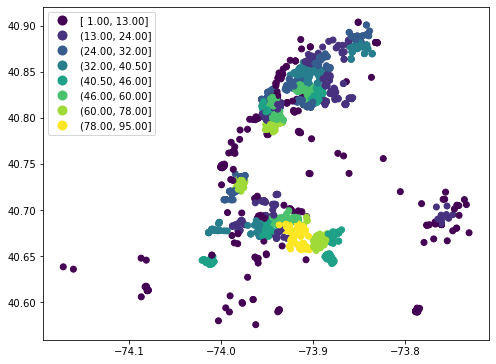

In [50]:
Geo = sjoin_NYC.merge(lowincomebyzip,left_on='Postcode',right_on='Postcode',how='left')
# plot as a heatmap with quantiles color scheme
Geo.plot(figsize=(8,8),column ='Very Low Income Units_y',k=8,scheme='Quantiles',legend=True,legend_kwds={'loc':'upper left'})

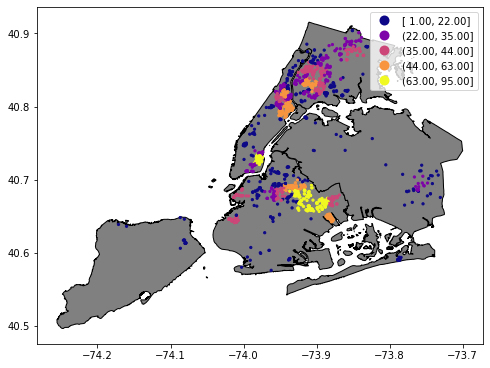

In [55]:
boundary = gpd.read_file(r'C:\Users\Nicole\Downloads\Borough Boundaries\geo_export_402abf60-ff4f-4bd7-a85b-460323a12e85.shp')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(8, 8))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
Geo.plot(ax=ax, column='Very Low Income Units_y', cmap='plasma',scheme='quantiles', marker='o', markersize=5, legend=True);

In [36]:
boundary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BoroName    5 non-null      object 
 1   the_geom    5 non-null      object 
 2   Shape_Leng  5 non-null      float64
 3   BoroCode    5 non-null      int64  
 4   Shape_Area  5 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 328.0+ bytes
